In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
import warnings
warnings.filterwarnings("ignore")


In [98]:
%pwd

'C:\\Users\\USER\\project'

In [99]:
# Load the Excel file

df = pd.read_csv( 'nigeria_cities_weather_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

  country    city  latitude  longitude    temp  temp_min  temp_max  pressure  humidity  sea_level  ground_level  wind_speed  wind_degree              sunrise               sunset  timezone  cloud description region  population        date
0      NG   Ankpa     7.380      7.650 311.930   311.930   311.930      1006        28       1006           964       0.440           34  2024-02-21 05:45:30  2024-02-21 17:41:02      3600     56      Clouds   Kogi       56362  2024-02-21
1      NG  Bugana     7.870      7.510 313.100   313.100   313.100      1006        29       1006           993       1.860           35  2024-02-21 05:46:26  2024-02-21 17:41:13      3600     46      Clouds   Kogi       11026  2024-02-21
2      NG   Adoru     7.170      7.040 311.610   311.610   311.610      1006        34       1006           993       1.780          211  2024-02-21 05:47:47  2024-02-21 17:43:38      3600     43      Clouds   Kogi       12230  2024-02-21
3      NG   Ankpa     7.320      7.670 312.7

In [100]:
df.head(1)

,country,city,latitude,longitude,temp,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,sunrise,sunset,timezone,cloud,description,region,population,date
0,NG,Ankpa,7.380,7.650,311.930,311.930,311.930,1006,28,1006,964,0.440,34,2024-02-21 05:45:30,2024-02-21 17:41:02,3600,56,Clouds,Kogi,56362,2024-02-21


In [101]:
print(df.shape)


(22541, 21)


In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22541 entries, 0 to 22540
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       22541 non-null  object 
 1   city          22541 non-null  object 
 2   latitude      22541 non-null  float64
 3   longitude     22541 non-null  float64
 4   temp          22541 non-null  float64
 5   temp_min      22541 non-null  float64
 6   temp_max      22541 non-null  float64
 7   pressure      22541 non-null  int64  
 8   humidity      22541 non-null  int64  
 9   sea_level     22541 non-null  int64  
 10  ground_level  22541 non-null  int64  
 11  wind_speed    22541 non-null  float64
 12  wind_degree   22541 non-null  int64  
 13  sunrise       22541 non-null  object 
 14  sunset        22541 non-null  object 
 15  timezone      22541 non-null  int64  
 16  cloud         22541 non-null  int64  
 17  description   22541 non-null  object 
 18  region        22541 non-nu

In [103]:
#summary statistics
print(df.describe())

       latitude  longitude      temp  temp_min  temp_max  pressure  humidity  sea_level  ground_level  wind_speed  wind_degree  timezone     cloud  population
count 22541.000  22541.000 22541.000 22541.000 22541.000 22541.000 22541.000  22541.000     22541.000   22541.000    22541.000 22541.000 22541.000   22541.000
mean      8.609      8.841   303.319   303.319   303.319  1010.194    38.043   1010.194       976.205       2.940      134.335  3600.000    71.735   53158.651
std       2.608      3.081     4.000     4.000     4.000     2.305    22.000      2.305        27.642       1.545      103.008     0.000    35.938  152217.319
min       4.330      2.880   291.090   291.090   291.090  1003.000     7.000   1003.000       873.000       0.030        0.000  3600.000     0.000       0.000
25%       6.310      6.870   300.810   300.810   300.810  1009.000    19.000   1009.000       954.000       1.780       39.000  3600.000    47.000    5780.000
50%       9.480      7.550   303.440   303.440

In [104]:
#missing values
print(df.isnull().sum())


#data types of column
print(df.dtypes)


country         0
city            0
latitude        0
longitude       0
temp            0
temp_min        0
temp_max        0
pressure        0
humidity        0
sea_level       0
ground_level    0
wind_speed      0
wind_degree     0
sunrise         0
sunset          0
timezone        0
cloud           0
description     0
region          0
population      0
date            0
dtype: int64
country          object
city             object
latitude        float64
longitude       float64
temp            float64
temp_min        float64
temp_max        float64
pressure          int64
humidity          int64
sea_level         int64
ground_level      int64
wind_speed      float64
wind_degree       int64
sunrise          object
sunset           object
timezone          int64
cloud             int64
description      object
region           object
population        int64
date             object
dtype: object


In [105]:
#Remove duplicates
df = df.drop_duplicates()

In [106]:
# Fill missing numerical values with the mean
numerical_cols = ['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level', 'ground_level', 'wind_speed', 'wind_degree', 'cloud', 'population']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [107]:
# Fill missing categorical values with the mode
categorical_cols = ['description', 'region']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])



In [108]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])


In [109]:
# Extract features from the date
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [110]:
# Drop the original date column
df.drop(columns=['date'], inplace=True)

In [111]:
# Encode city names and region
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])



In [112]:
# Drop the original categorical columns
df.drop(columns=['country','sunrise','sunset','timezone','description','region','city'], inplace=True)

In [113]:
features = ['city_encoded', 'latitude', 'longitude', 'pressure', 'humidity', 'sea_level', 'ground_level', 'wind_speed', 'wind_degree', 'cloud', 'population', 'day', 'month', 'year']
target = 'temp'
X = df[features]
y = df[target]

In [114]:
df.head(10)

,latitude,longitude,temp,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,population,day,month,year,city_encoded,region_encoded
0,7.380,7.650,311.930,311.930,311.930,1006,28,1006,964,0.440,34,56,56362,21,2,2024,11,3
1,7.870,7.510,313.100,313.100,313.100,1006,29,1006,993,1.860,35,46,11026,21,2,2024,28,3
2,7.170,7.040,311.610,311.610,311.610,1006,34,1006,993,1.780,211,43,12230,21,2,2024,3,3
3,7.320,7.670,312.750,312.750,312.750,1006,28,1006,974,0.350,45,60,12470,21,2,2024,11,3
4,7.570,6.990,310.250,310.250,310.250,1006,33,1006,961,1.630,219,40,13261,21,2,2024,1,3
5,6.810,6.640,313.080,313.080,313.080,1006,33,1006,1002,1.110,136,57,7040,21,2,2024,68,3
6,7.510,7.310,311.430,311.430,311.430,1006,29,1006,965,1.470,225,51,13261,21,2,2024,1,3
7,8.410,7.000,314.130,314.130,314.130,1006,27,1006,986,0.840,214,37,5864,21,2,2024,27,3
8,7.580,6.180,311.010,311.010,311.010,1006,29,1006,957,0.880,233,70,280024,21,2,2024,107,3
9,7.300,7.340,312.160,312.160,312.160,1006,31,1006,986,1.740,236,56,10641,21,2,2024,48,3


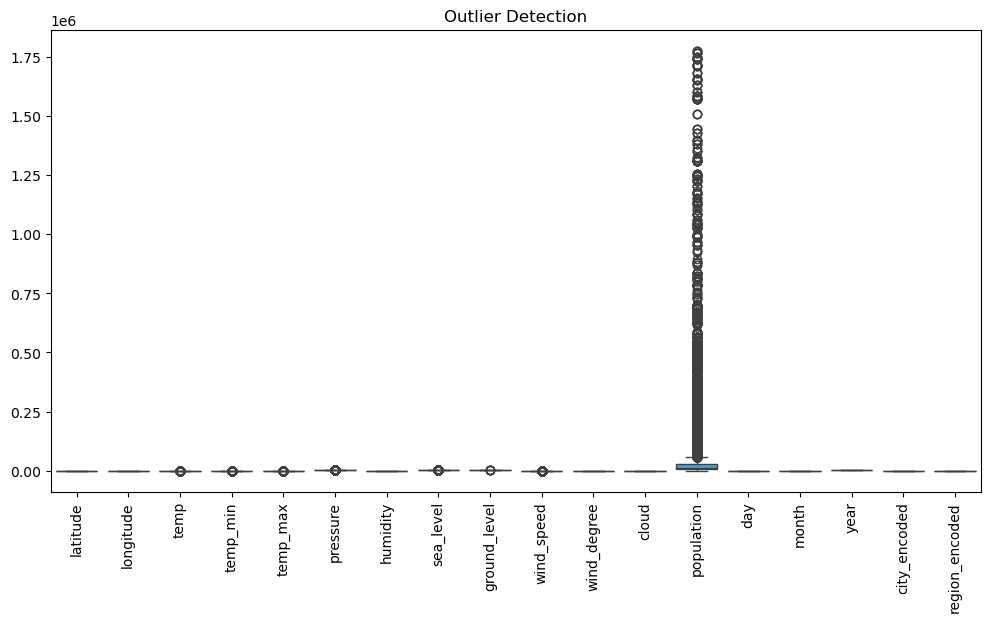

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()


In [116]:
# checking the correlation of the data
g = df.corr()
g

,latitude,longitude,temp,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,population,day,month,year,city_encoded,region_encoded
latitude,1.000,0.760,-0.132,-0.132,-0.132,0.405,-0.750,0.405,-0.720,0.378,-0.646,-0.067,-0.243,0.051,NaN,NaN,0.138,-0.680
longitude,0.760,1.000,0.055,0.055,0.055,0.217,-0.614,0.217,-0.417,0.422,-0.544,-0.027,-0.335,0.007,NaN,NaN,0.108,-0.615
temp,-0.132,0.055,1.000,1.000,1.000,-0.640,-0.296,-0.640,0.260,0.221,-0.002,-0.079,0.028,-0.249,NaN,NaN,-0.011,-0.024
temp_min,-0.132,0.055,1.000,1.000,1.000,-0.640,-0.296,-0.640,0.260,0.221,-0.002,-0.079,0.028,-0.249,NaN,NaN,-0.011,-0.024
temp_max,-0.132,0.055,1.000,1.000,1.000,-0.640,-0.296,-0.640,0.260,0.221,-0.002,-0.079,0.028,-0.249,NaN,NaN,-0.011,-0.024
pressure,0.405,0.217,-0.640,-0.640,-0.640,1.000,-0.083,1.000,-0.387,-0.015,-0.322,-0.075,-0.141,0.590,NaN,NaN,0.052,-0.177
humidity,-0.750,-0.614,-0.296,-0.296,-0.296,-0.083,1.000,-0.083,0.662,-0.297,0.642,0.123,0.249,0.002,NaN,NaN,-0.111,0.610
sea_level,0.405,0.217,-0.640,-0.640,-0.640,1.000,-0.083,1.000,-0.387,-0.015,-0.322,-0.075,-0.141,0.590,NaN,NaN,0.052,-0.177
ground_level,-0.720,-0.417,0.260,0.260,0.260,-0.387,0.662,-0.387,1.000,-0.112,0.528,0.129,0.231,-0.060,NaN,NaN,-0.120,0.498
wind_speed,0.378,0.422,0.221,0.221,0.221,-0.015,-0.297,-0.015,-0.112,1.000,-0.388,-0.009,-0.024,-0.123,NaN,NaN,0.034,-0.209


In [117]:
X = df['latitude']
y = df['temp']

In [118]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [119]:
X_train.shape

(15774,)

In [120]:
X_test.shape

(6761,)

In [121]:
#Model building
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [122]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     291.6
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           8.69e-65
Time:                        21:13:05   Log-Likelihood:                -44082.
No. Observations:               15774   AIC:                         8.817e+04
Df Residuals:                   15772   BIC:                         8.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        305.0982      0.109   2801.652      0.0

####TEMP = 305.0982 + latitude x-0.2068

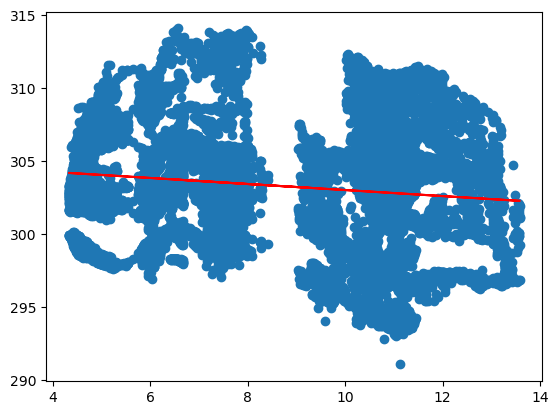

In [124]:
# Let us show the line fitting:
plt.scatter(X_train,y_train)
plt.plot(X_train, 305.0982 + X_train * -0.2068,'r')
plt.show()

In [125]:
#Residual analysis
y_train_pred = model.predict(X_train_sm)

In [126]:
y_train_pred.head()

20742   303.739
9229    303.061
7881    303.835
7089    302.927
6538    303.667
dtype: float64

In [127]:
residual = (y_train - y_train_pred)

In [128]:
residual.head()

20742    0.291
9229    -5.831
7881     0.985
7089     1.143
6538     2.613
dtype: float64

<Axes: ylabel='Density'>

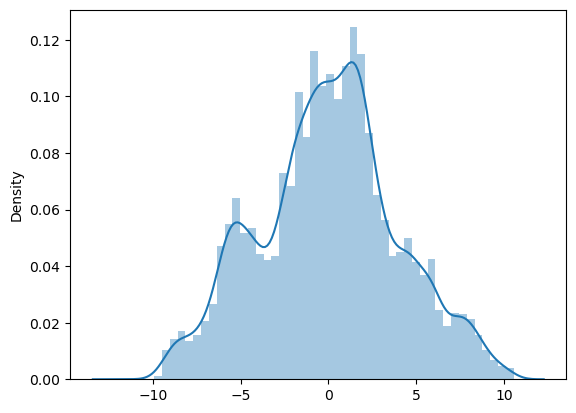

In [129]:
sns.distplot(residual)

<Axes: >

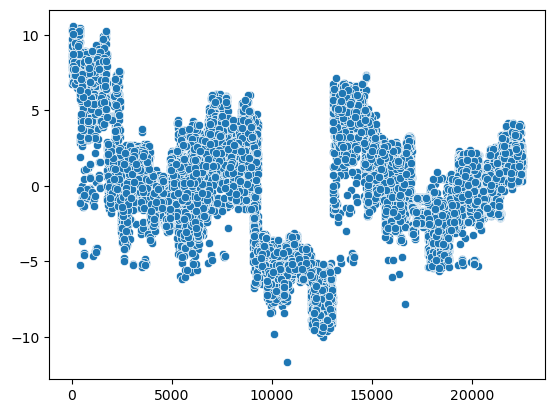

In [130]:
sns.scatterplot(residual)

In [131]:
#predictions on the test data
X_test_sm = sm.add_constant(X_test)

In [132]:
y_pred = model.predict(X_test_sm)

In [133]:
#root mean squared error:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

3.9829769287125387

In [134]:
#r2score
r2_score(y_test,y_pred)

0.01578956302930279

The model explains 1.58% of variance

In [136]:
#save model
import joblib

In [137]:
joblib.dump(model, 'weather_forecast_model.pkl')


['weather_forecast_model.pkl']

In [145]:
joblib.dump(scaler, "scaler.pkl")

NameError: name 'scaler' is not defined

In [141]:
joblib.dump(label_enc, "label_encoder.pkl")

NameError: name 'label_enc' is not defined

In [174]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [178]:
X = df['latitude']
y = df['temp']

TypeError: 'LogisticRegression' object is not subscriptable